<a href="https://colab.research.google.com/github/hamzakpt/Pytorch_DCGAN_CeleA/blob/master/Pytorch_DCGAN_CeleA_Generate_celebrity_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Generation

In this project, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-face-generation/assets/processed_face_data.png?raw=1' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

In [0]:
!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip

--2020-03-26 10:42:32--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.12.126
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.12.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247694507 (236M) [application/zip]
Saving to: ‘processed-celeba-small.zip’

processed-celeba-sm 100%[===================>] 236.22M  34.6MB/s    in 7.4s    

2020-03-26 10:42:40 (32.0 MB/s) - ‘processed-celeba-small.zip’ saved [247694507/247694507]



In [0]:
# can comment out after executing
!unzip processed-celeba-small.zip

Streaming output truncated to the last 5000 lines.
  inflating: processed_celeba_small/celeba/New Folder With Items/052333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052344.jpg  
  inflating: 

In [0]:
!pip install comet_ml
from comet_ml import Experiment
experiment = Experiment(api_key="KixMWPbjP5nUm5LKr3R8GKR2I",
                        project_name="general", workspace="hamzakpt")
experiment.add_tag('assignment2')

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/hamzakpt/general/7102262b91c64b94a129e0c146de584a



In [0]:

import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

#### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

#### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [0]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms


from torch.utils.data import DataLoader

In [0]:
def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    
    # TODO: Implement function and return a dataloader
    train_transforms = transforms.Compose([
                                       transforms.Scale((image_size, image_size)),
                                       transforms.ToTensor(),
                                       ])
    train_dataset = datasets.ImageFolder(root=data_dir,
                                     transform=train_transforms)
    trainset = DataLoader(dataset=train_dataset,
                      batch_size=batch_size,
                      shuffle=True,
                      
                      pin_memory=True)
    return trainset


## Create a DataLoader

#### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [0]:
# Define function hyperparameters
# batch_size = 64
img_size = 64
# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:220: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


Next, you can view some images! You should seen square images of somewhat-centered faces.

Note: You'll need to convert the Tensor images into a NumPy type and transpose the dimensions to correctly display an image, suggested `imshow` code is below, but it may not be perfect.

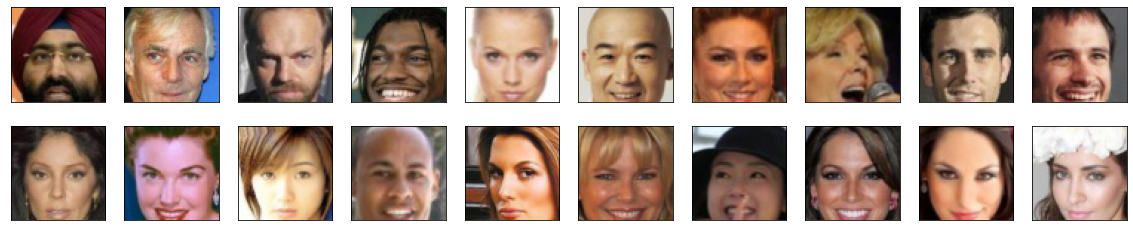

In [0]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

#### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [0]:
# TODO: Complete the scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    min, max = feature_range
    x = x * (max - min) + min
    return x
    # x = x.data.numpy()
    # domain = np.min(x), np.max(x)
    # y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    # new_x = y * (feature_range[1] - feature_range[0]) + (feature_range[1] + feature_range[0]) / 2
    # # return Variable(torch.Tensor(new_x))
    # return torch.from_numpy(new_x).float()
    # return x


In [0]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# check scaled range
# should be close to -1 to 1
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())

Min:  tensor(-1.)
Max:  tensor(1.)


---
# Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

## Discriminator

Your first task will be to define the discriminator. This is a convolutional classifier like you've built before, only without any maxpooling layers. To deal with this complex data, it's suggested you use a deep network with **normalization**. You are also allowed to create any helper functions that may be useful.

#### Exercise: Complete the Discriminator class
* The inputs to the discriminator are 32x32x3 tensor images
* The output should be a single value that will indicate whether a given image is real or fake


In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        """
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(3, conv_dim, 4, 2, 1)
        self.conv2 = nn.Conv2d(conv_dim, conv_dim*2, 4, 2, 1)
        self.conv2_bn = nn.BatchNorm2d(conv_dim*2)
        self.conv3 = nn.Conv2d(conv_dim*2, conv_dim*4, 4, 2, 1)
        self.conv3_bn = nn.BatchNorm2d(conv_dim*4)
        self.conv4 = nn.Conv2d(conv_dim*4, conv_dim*8, 4, 2, 1)
        self.conv4_bn = nn.BatchNorm2d(conv_dim*8)
        self.conv5 = nn.Conv2d(conv_dim*8, 1, 4, 1, 0)

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: Discriminator logits; the output of the neural network
        """
        x = F.leaky_relu(self.conv1(x), 0.2)
        x = F.leaky_relu(self.conv2_bn(self.conv2(x)), 0.2)
        x = F.leaky_relu(self.conv3_bn(self.conv3(x)), 0.2)
        x = F.leaky_relu(self.conv4_bn(self.conv4(x)), 0.2)
        x = F.sigmoid(self.conv5(x))

        return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# tests.test_discriminator(Discriminator)

"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

## Generator

The generator should upsample an input and generate a *new* image of the same size as our training data `32x32x3`. This should be mostly transpose convolutional layers with normalization applied to the outputs.

#### Exercise: Complete the Generator class
* The inputs to the generator are vectors of some length `z_size`
* The output should be a image of shape `32x32x3`

In [0]:

class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        """
        super(Generator, self).__init__()
        self.deconv1 = nn.ConvTranspose2d(z_size, conv_dim*8, 4, 1, 0)
        self.deconv1_bn = nn.BatchNorm2d(conv_dim*8)
        self.deconv2 = nn.ConvTranspose2d(conv_dim*8, conv_dim*4, 4, 2, 1)
        self.deconv2_bn = nn.BatchNorm2d(conv_dim*4)
        self.deconv3 = nn.ConvTranspose2d(conv_dim*4, conv_dim*2, 4, 2, 1)
        self.deconv3_bn = nn.BatchNorm2d(conv_dim*2)
        self.deconv4 = nn.ConvTranspose2d(conv_dim*2, conv_dim, 4, 2, 1)
        self.deconv4_bn = nn.BatchNorm2d(conv_dim)
        self.deconv5 = nn.ConvTranspose2d(conv_dim, 3, 4, 2, 1)

        # complete init function
        

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: A 32x32x3 Tensor image as output
        """
        x = F.relu(self.deconv1_bn(self.deconv1(x)))
        x = F.relu(self.deconv2_bn(self.deconv2(x)))
        x = F.relu(self.deconv3_bn(self.deconv3(x)))
        x = F.relu(self.deconv4_bn(self.deconv4(x)))
        x = F.tanh(self.deconv5(x))

        return x

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# tests.test_generator(Generator)

"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

## Initialize the weights of your networks

To help your models converge, you should initialize the weights of the convolutional and linear layers in your model. From reading the [original DCGAN paper](https://arxiv.org/pdf/1511.06434.pdf), they say:
> All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.

So, your next task will be to define a weight initialization function that does just this!

You can refer back to the lesson on weight initialization or even consult existing model code, such as that from [the `networks.py` file in CycleGAN Github repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/models/networks.py) to help you complete this function.

#### Exercise: Complete the weight initialization function

* This should initialize only **convolutional** and **linear** layers
* Initialize the weights to a normal distribution, centered around 0, with a standard deviation of 0.02.
* The bias terms, if they exist, may be left alone or set to 0.

In [0]:
def weights_init_normal(m):
    """
    Applies initial weights to certain layers in a model .
    The weights are taken from a normal distribution 
    with mean = 0, std dev = 0.02.
    :param m: A module or layer in a network    
    """
    # classname will be something like:
    # `Conv`, `BatchNorm2d`, `Linear`, etc.
    classname = m.__class__.__name__
    
    # TODO: Apply initial weights to convolutional and linear layers
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
    

## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [0]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)

    # initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)

    print(D)
    print()
    print(G)
    
    return D, G


#### Exercise: Define model hyperparameters

In [0]:
# Define model hyperparams
d_conv_dim = 64
g_conv_dim = 64
z_size = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

Discriminator(
  (conv1): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv2_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv3_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv4_bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1))
)

Generator(
  (deconv1): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1))
  (deconv1_bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv2): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (deconv2_bn): BatchNorm2d(256, eps=1e-05, momentum

### Training on GPU

Check if you can train on GPU. Here, we'll set this as a boolean variable `train_on_gpu`. Later, you'll be responsible for making sure that 
>* Models,
* Model inputs, and
* Loss function arguments

Are moved to GPU, where appropriate.

In [0]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


---
## Discriminator and Generator Losses

Now we need to calculate the losses for both types of adversarial networks.

### Discriminator Losses

> * For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`. 
* Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.


### Generator Loss

The generator loss will look similar only with flipped labels. The generator's goal is to get the discriminator to *think* its generated images are *real*.

#### Exercise: Complete real and fake loss functions

**You may choose to use either cross entropy or a least squares error loss to complete the following `real_loss` and `fake_loss` functions.**

In [0]:
# def real_loss(D_out):
#     '''Calculates how close discriminator outputs are to being real.
#        param, D_out: discriminator logits
#        return: real loss'''
#     loss = 
#     return loss

# def fake_loss(D_out):
#     '''Calculates how close discriminator outputs are to being fake.
#        param, D_out: discriminator logits
#        return: fake loss'''
#     loss = 
#     return loss

# criterion = nn.BCELoss()

def real_loss(D_out, smooth=False):
    batch_size = D_out.size(0)
    # label smoothing
    if smooth:
        # smooth, real labels = 0.9
        labels = torch.ones(batch_size)*0.9
    else:
        labels = torch.ones(batch_size) # real labels = 1
    # move labels to GPU if available     
    if train_on_gpu:
        labels = labels.cuda()
    # binary cross entropy with logits loss
    criterion = nn.BCELoss()#nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size) # fake labels = 0
    if train_on_gpu:
        labels = labels.cuda()
    criterion = nn.BCELoss()#nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

## Optimizers

#### Exercise: Define optimizers for your Discriminator (D) and Generator (G)

Define optimizers for your models with appropriate hyperparameters.

In [0]:
import torch.optim as optim

# Create optimizers for the discriminator D and generator G
lr = 0.002
beta1=0.5
beta2=0.999 # default value
d_optimizer = optim.Adam(D.parameters(), lr, [beta1, beta2])
g_optimizer = optim.Adam(G.parameters(), lr, [beta1, beta2])

---
## Training

Training will involve alternating between training the discriminator and the generator. You'll use your functions `real_loss` and `fake_loss` to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function


#### Saving Samples

You've been given some code to print out some loss statistics and save some generated "fake" samples.

#### Exercise: Complete the training function

Keep in mind that, if you've moved your models to GPU, you'll also have to move any model inputs to GPU.

In [0]:
def train(D, G, n_epochs, batch_size,  print_every=5):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''
    
    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()

    # keep track of loss and generated, "fake" samples
    samples = []
    losses = []

    # Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=16
    # fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
    fixed_z = torch.randn((5 * 5, z_size)).view(-1, z_size, 1, 1).cuda()
    #torch.randn(batch_size, z_size, 1, 1).cuda()#torch.from_numpy(fixed_z).float()
    
    # move z to GPU if available
    # if train_on_gpu:
    #     fixed_z = fixed_z.cuda()

    # epoch training loop
    with experiment.train():
      counter = 1
      for epoch in range(n_epochs):

          # batch training loop
          for batch_i, (real_images, _) in enumerate(celeba_train_loader):
              real_images = scale(real_images)

              # ===============================================
              #         YOUR CODE HERE: TRAIN THE NETWORKS
              # ===============================================


              # ============================================
              #            TRAIN THE DISCRIMINATOR
              # ============================================
              d_optimizer.zero_grad()
              # 1. Train the discriminator on real and fake images
              real_images = real_images.cuda()
              D_real = D(real_images)
              # print("D_real: ", D_real)
              d_real_loss = real_loss(D_real, True)
              # d_real_loss.backward()
              # 2. Train the generator with an adversarial loss
              # z = np.random.uniform(-1, 1, size=(batch_size, z_size))
              # z = torch.from_numpy(z).float()
              # z = z.cuda()
              z = torch.randn((batch_size, z_size)).view(-1, z_size, 1, 1).cuda()
              # torch.randn(batch_size, z_size, 1, 1).cuda()
              fake_images = G(z)
              D_fake = D(fake_images)
              # print("D_fake: ", D_fake)
              d_fake_loss = fake_loss(D_fake)
              # d_fake_loss.backward()


              
              d_loss = d_real_loss + d_fake_loss
              experiment.log_metric("D_loss", float(d_loss.data.cpu()), step=counter)
              d_loss.backward()
              d_optimizer.step()
              # =========================================
              #            TRAIN THE GENERATOR
              # =========================================
              g_optimizer.zero_grad()
              # 1. Train with fake images and flipped labels
          
              # Generate fake images
              z = torch.randn((batch_size, z_size)).view(-1, z_size, 1, 1).cuda()
              #  np.random.uniform(-1, 1, size=(batch_size, z_size))
              # z = torch.randn(batch_size, z_size, 1, 1).cuda()#torch.from_numpy(z).float().cuda()
              fake_images = G(z)
              # Compute the discriminator losses on fake images 
              # using flipped labels!
              D_fake = D(fake_images)
              
              g_loss = real_loss(D_fake) # use real loss to flip labels
              experiment.log_metric("G_loss", float(g_loss.data.cpu()), step=counter)
              counter += 1
              # perform backprop
              g_loss.backward()
              g_optimizer.step()
              
              # ===============================================
              #              END OF YOUR CODE
              # ===============================================

              # Print some loss stats
              if batch_i % print_every == 0:
                  # append discriminator loss and generator loss
                  losses.append((d_loss.item(), g_loss.item()))
                  # print discriminator and generator loss
                  print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                          epoch+1, n_epochs, d_loss.item(), g_loss.item()))
                  
                  # view_samples(-1, [G(fixed_z)])
                  # print("*************************************************************")


          ## AFTER EACH EPOCH##    
          # this code assumes your generator is named G, feel free to change the name
          # generate and save sample, fake images
          G.eval() # for generating samples
          samples_z = G(fixed_z)
          samples.append(samples_z)
          G.train() # back to training mode

    # Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    # finally return losses
    return losses

Set your number of training epochs and train your GAN!

In [0]:
# set number of epochs 
n_epochs = 50


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# call training function
losses = train(D, G,  n_epochs=n_epochs, batch_size=batch_size, print_every=500)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch [    1/   50] | d_loss: 1.9698 | g_loss: 45.4019
Epoch [    1/   50] | d_loss: 0.7766 | g_loss: 2.0514
Epoch [    2/   50] | d_loss: 0.9791 | g_loss: 2.3857
Epoch [    2/   50] | d_loss: 1.4786 | g_loss: 2.0018
Epoch [    3/   50] | d_loss: 1.0797 | g_loss: 1.5753
Epoch [    3/   50] | d_loss: 1.3223 | g_loss: 4.8844
Epoch [    4/   50] | d_loss: 1.9800 | g_loss: 4.9693
Epoch [    4/   50] | d_loss: 1.2515 | g_loss: 2.0206
Epoch [    5/   50] | d_loss: 1.1287 | g_loss: 1.8999
Epoch [    5/   50] | d_loss: 0.9585 | g_loss: 1.5699
Epoch [    6/   50] | d_loss: 1.3344 | g_loss: 3.7483
Epoch [    6/   50] | d_loss: 1.1878 | g_loss: 1.7637
Epoch [    7/   50] | d_loss: 1.3006 | g_loss: 2.4942
Epoch [    7/   50] | d_loss: 1.2790 | g_loss: 1.0931
Epoch [    8/   50] | d_loss: 1.2325 | g_loss: 1.4238
Epoch [    8/   50] | d_loss: 1.3468 | g_loss: 2.4311
Epoch [    9/   50] | d_loss: 0.9554 | g_loss: 1.7739
Epoch [    9/   50] | d_loss: 1.2868 | g_loss: 2.1588
Epoch [   10/   50] | d_los

### COMET.ML Loss graph

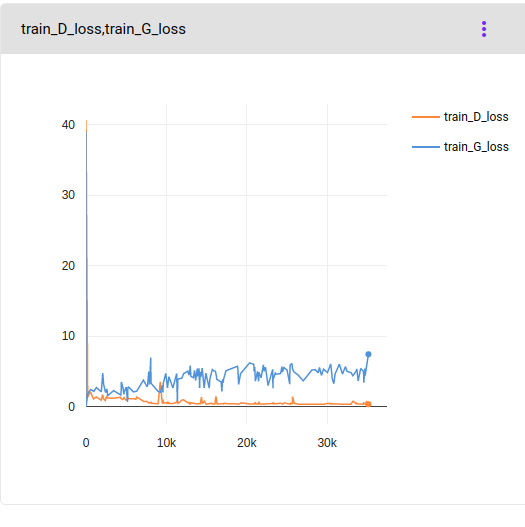

## Training loss

Plot the training losses for the generator and discriminator, recorded after each epoch.

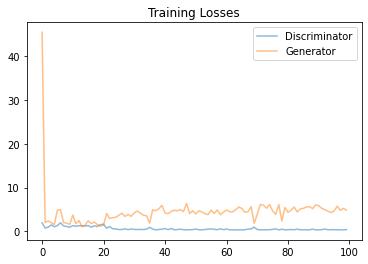

In [0]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Generator samples from training

View samples of images from the generator, and answer a question about the strengths and weaknesses of your trained models.

In [0]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((64,64,3)))
        # plt.show()

In [0]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

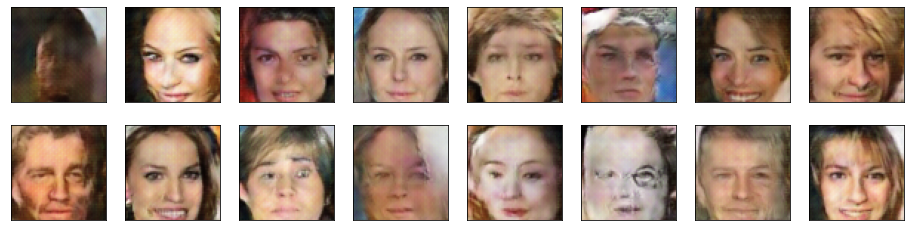

In [0]:

_ = view_samples(-1, samples)

# Different Loss function

In [0]:
# criterion = nn.BCEWithLogitsLoss()

In [0]:
def real_loss(D_out, smooth=False):
    batch_size = D_out.size(0)
    # label smoothing
    if smooth:
        # smooth, real labels = 0.9
        labels = torch.ones(batch_size)*0.9
    else:
        labels = torch.ones(batch_size) # real labels = 1
    # move labels to GPU if available     
    if train_on_gpu:
        labels = labels.cuda()
    # binary cross entropy with logits loss
    criterion = nn.BCELoss()#nn.BCEWithLogitsLoss()
    
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size) # fake labels = 0
    if train_on_gpu:
        labels = labels.cuda()
    criterion = nn.BCELoss()#nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

In [0]:
n_epochs = 20
losses = train(D, G,  n_epochs=n_epochs, batch_size=batch_size, print_every=500)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch [    1/   20] | d_loss: 1.7966 | g_loss: 41.3505
Epoch [    1/   20] | d_loss: 2.1310 | g_loss: 7.2581
Epoch [    2/   20] | d_loss: 1.5186 | g_loss: 1.2135
Epoch [    2/   20] | d_loss: 1.1746 | g_loss: 1.6515
Epoch [    3/   20] | d_loss: 1.0275 | g_loss: 1.7909
Epoch [    3/   20] | d_loss: 1.8292 | g_loss: 4.5394
Epoch [    4/   20] | d_loss: 1.1343 | g_loss: 2.3731
Epoch [    4/   20] | d_loss: 0.9683 | g_loss: 2.8565
Epoch [    5/   20] | d_loss: 0.9300 | g_loss: 3.2350
Epoch [    5/   20] | d_loss: 1.5770 | g_loss: 3.0950
Epoch [    6/   20] | d_loss: 1.0689 | g_loss: 2.6082
Epoch [    6/   20] | d_loss: 1.1725 | g_loss: 2.1085
Epoch [    7/   20] | d_loss: 1.2448 | g_loss: 1.3322
Epoch [    7/   20] | d_loss: 0.9439 | g_loss: 2.0497
Epoch [    8/   20] | d_loss: 1.0081 | g_loss: 1.6054
Epoch [    8/   20] | d_loss: 0.9561 | g_loss: 1.8550
Epoch [    9/   20] | d_loss: 1.0502 | g_loss: 1.8393
Epoch [    9/   20] | d_loss: 0.9135 | g_loss: 1.6712
Epoch [   10/   20] | d_los

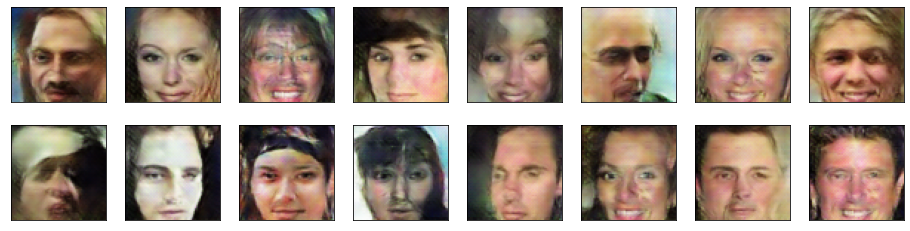

In [0]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples(-1, samples)

### COMET.ML Loss graph

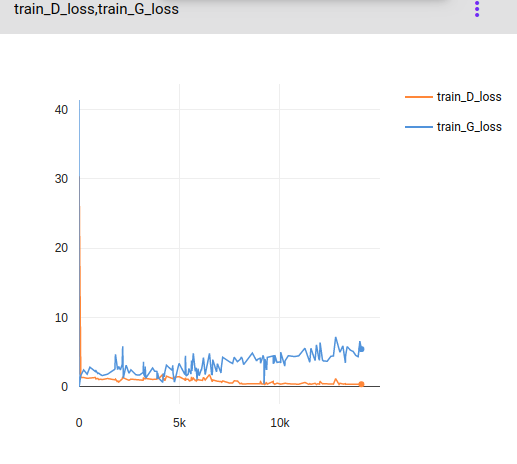

# References

Labs

[Github Repo](https://github.com/znxlwm/pytorch-MNIST-CelebA-GAN-DCGAN)

